Code with elevator capacity that when elevator stops it takes in everybody in the floor


# Simulation Model 2.0

In [ ]:
import numpy as np

# Parameters
num_floors = 8
elevator_speed = 10  # time to move between floors (in seconds)
stop_time = 10  # time to stop at each floor (in seconds)
simulation_time = 3000  # simulate for 1 hour
arrival_rate = [0.5, 0.15, 0.1, 0.2, 0.2, 0.15, 0.2 ,0.1]  # average arrivals per second for each floor
elevator_capacity = 10  # maximum number of people the elevator can carry

# Initialize variables
arrival_times = {floor: [] for floor in range(num_floors)}
waiting_times = {floor: [] for floor in range(num_floors)}

# Generate arrival times for each floor using Poisson and exponential distributions
for floor in range(num_floors):
    # Number of arrivals in the entire simulation time
    num_arrivals = np.random.poisson(arrival_rate[floor] * simulation_time)

    # Arrival times as cumulative sum of exponential inter-arrival times
    if num_arrivals > 0:
        inter_arrival_times = np.random.exponential(1 / arrival_rate[floor], num_arrivals)
        arrival_times[floor] = list(np.cumsum(inter_arrival_times))

# Simulate elevator movement and calculate waiting times
time = 0

while time < simulation_time:
    # Elevator goes up
    for floor in range(num_floors):
        time += elevator_speed  # Move elevator to the next floor (add travel time)
        if time > simulation_time:
            break


        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time :
            # Calculate the number of people that can board the elevator
            num_boarding = min(elevator_capacity, len(arrival_times[floor]))
            # Process each person boarding the elevator
            for _ in range(num_boarding):
                arrival_time = arrival_times[floor].pop(0)  # Remove and get the arrival time of the next person
                waiting_time = max(0, time - arrival_time)  # Ensure waiting time is non-negative
                waiting_times[floor].append(waiting_time)  # Calculate waiting time and store it
            if len(arrival_times[floor]) == 0:
                break  # No more arrivals at this floor, move to the next floor
        # if inside == elevator_capacity:
        #   time += elevator_speed * (7-floor)
        #   inside = 0
        #   floor = 7
        time += stop_time  # Add the stop time for the elevator to pick up/drop off passengers

    # Elevator goes down
    for floor in range(num_floors - 2, 0, -1):  # Iterate through floors 6 to 0
        time += elevator_speed  # Move elevator to the next floor (add travel time)
        if time > simulation_time:
            break

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time:
            # Calculate the number of people that can board the elevator
            num_boarding = min(elevator_capacity, len(arrival_times[floor]))
            # Process each person boarding the elevator
            for _ in range(num_boarding):
                arrival_time = arrival_times[floor].pop(0)  # Remove and get the arrival time of the next person
                waiting_time = max(0, time - arrival_time)  # Ensure waiting time is non-negative
                waiting_times[floor].append(waiting_time)  # Calculate waiting time and store it
            if len(arrival_times[floor]) == 0:
                break  # No more arrivals at this floor, move to the next floor
        time += stop_time  # Add the stop time for the elevator to pick up/drop off passengers
    time += elevator_speed

# Calculate and print average waiting times
average_waiting_times = {floor: np.mean(waiting_times[floor]) if waiting_times[floor] else 0 for floor in range(num_floors)}
for floor in range(num_floors):
    print(f"Average waiting time at floor {floor}: {average_waiting_times[floor]:.2f} seconds")

Average waiting time at floor 0: 135.80 seconds
Average waiting time at floor 1: 72.28 seconds
Average waiting time at floor 2: 48.01 seconds
Average waiting time at floor 3: 54.45 seconds
Average waiting time at floor 4: 61.05 seconds
Average waiting time at floor 5: 57.44 seconds
Average waiting time at floor 6: 87.10 seconds
Average waiting time at floor 7: 105.52 seconds


MARTA'S VERSION 2.1:

# Simulation Model 2.1 (Marta)


In [ ]:
import numpy as np

# Parameters
num_floors = 8
elevator_speed = 10  # time to move between floors (in seconds)
stop_time = 10  # time to stop at each floor (in seconds)
simulation_time = 3000  # simulate for 1 hour
arrival_rate = [0.1, 0.15, 0.3, 0.2, 0.4, 0.5, 0.4, 0.4]  # average arrivals per second for each floor
elevator_capacity = 100  # maximum number of people the elevator can carry

# Initialize variables
arrival_times = {floor: [] for floor in range(num_floors)}
waiting_times = {floor: [] for floor in range(num_floors)}

# Generate arrival times for each floor using Poisson and exponential distributions
for floor in range(num_floors):
    # Number of arrivals in the entire simulation time
    num_arrivals = np.random.poisson(arrival_rate[floor] * simulation_time)

    # Arrival times as cumulative sum of exponential inter-arrival times
    if num_arrivals > 0:
        inter_arrival_times = np.random.exponential(1 / arrival_rate[floor], num_arrivals)
        arrival_times[floor] = list(np.cumsum(inter_arrival_times))

# Simulate elevator movement and calculate waiting times
time = 0
inside = 0  # Initialize the number of people inside the elevator
current_floor = 0  # Start at the ground floor
direction = 'up'  # Start by going up

while time < simulation_time:
    if direction == 'up':
        # Elevator goes up
        for floor in range(current_floor, num_floors):
            time += elevator_speed  # Move elevator to the next floor (add travel time)
            current_floor = floor  # Update current floor
            if time > simulation_time:
                break

            # Check people waiting at this floor
            while len(arrival_times[current_floor]) > 0 and arrival_times[current_floor][0] <= time and inside < elevator_capacity:
                # Calculate the number of people that can board the elevator
                num_boarding = min(elevator_capacity - inside, len(arrival_times[current_floor]))
                inside += num_boarding
                # Process each person boarding the elevator
                for _ in range(num_boarding):
                    arrival_time = arrival_times[current_floor].pop(0)  # Remove and get the arrival time of the next person
                    waiting_time = max(0, time - arrival_time)  # Ensure waiting time is non-negative
                    waiting_times[current_floor].append(waiting_time)  # Calculate waiting time and store it

            time += stop_time  # Add the stop time for the elevator to pick up/drop off passengers

            # Check if the elevator is at full capacity
            if inside >= elevator_capacity or len(arrival_times[current_floor])==0:
                change = current_floor
                break  # Elevator is full, start going down

        direction = 'down'  # Switch direction

    elif direction == 'down':
        # Elevator goes down
        for floor in range(change, -1, -1):
            time += elevator_speed  # Move elevator to the next floor (add travel time)
            current_floor = floor  # Update current floor
            if time > simulation_time:
                break

            # Check people waiting at this floor
            while len(arrival_times[current_floor]) > 0 and arrival_times[current_floor][0] <= time and inside < elevator_capacity:
                # Calculate the number of people that can board the elevator
                num_boarding = min(elevator_capacity - inside, len(arrival_times[current_floor]))
                inside += num_boarding
                # Process each person boarding the elevator
                for _ in range(num_boarding):
                    arrival_time = arrival_times[current_floor].pop(0)  # Remove and get the arrival time of the next person
                    waiting_time = max(0, time - arrival_time)  # Ensure waiting time is non-negative
                    waiting_times[current_floor].append(waiting_time)  # Calculate waiting time and store it

                time += stop_time  # Add the stop time for the elevator to pick up/drop off passengers

        # Unload passengers at the ground floor
        if current_floor == 0:
            time += stop_time  # Time to unload passengers at the ground floor
            inside = 0  # Unload all passengers

        direction = 'up'  # Switch direction

# Calculate and print average waiting times
average_waiting_times = {floor: np.mean(waiting_times[floor]) if waiting_times[floor] else 0 for floor in range(num_floors)}
for floor in range(num_floors):
    print(f"Average waiting time at floor {floor}: {average_waiting_times[floor]:.2f} seconds")


Average waiting time at floor 0: 1.34 seconds
Average waiting time at floor 1: 2.65 seconds
Average waiting time at floor 2: 18.63 seconds
Average waiting time at floor 3: 58.07 seconds
Average waiting time at floor 4: 812.93 seconds
Average waiting time at floor 5: 0.00 seconds
Average waiting time at floor 6: 0.00 seconds
Average waiting time at floor 7: 0.00 seconds


# Simulation Model 2.2 (Ale)

In [ ]:
import numpy as np

# Parameters
num_floors = 8
elevator_speed = 2  # time to move between floors (in seconds)
stop_time = 10  # time to stop at each floor (in seconds)
simulation_time = 3000  # simulate for _ seconds
arrival_rate = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]  # average arrivals per second for each floor
elevator_capacity = 10  # maximum number of people the elevator can carry

# Initialize variables
arrival_times = {floor: [] for floor in range(num_floors)}
waiting_times = {floor: [] for floor in range(num_floors)}
elevator = []  # List to hold people in the elevator (their arrival times)
elevator_floor = 0

# Generate arrival times for each floor using Poisson and exponential distributions
for floor in range(num_floors):
    num_arrivals = np.random.poisson(arrival_rate[floor] * simulation_time)
    if num_arrivals > 0:
        inter_arrival_times = np.random.exponential(1 / arrival_rate[floor], num_arrivals)
        arrival_times[floor] = list(np.cumsum(inter_arrival_times))

# Simulate elevator movement and calculate waiting times
time = 0

while time < simulation_time:
    # Elevator goes up
    for floor in range(num_floors):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
            arrival_time = arrival_times[floor].pop(0)
            waiting_time = max(0, time - arrival_time)
            waiting_times[floor].append(waiting_time)
            # Add person to elevator
            elevator.append(time)  # Track the time they boarded

        time += stop_time  # Add the stop time for the elevator to pick up passengers

        # If elevator is at maximum capacity, it goes to floor 0 to unload everyone
        if len(elevator) >= elevator_capacity:
            time += elevator_speed * (num_floors - 1 - elevator_floor)  # Time to reach the top floor
            elevator_floor = num_floors - 1
            elevator.clear()  # Unload everyone
            time += elevator_speed * (num_floors - 1)  # Time to go back to ground floor
            elevator_floor = 0
            time += stop_time  # Add stop time for unloading at ground floor

    # Elevator goes down
    for floor in range(num_floors - 2, 0, -1):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Unload people at floor 0 (destination floor)
        if elevator_floor == 0:
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
            arrival_time = arrival_times[floor].pop(0)
            waiting_time = max(0, time - arrival_time)
            waiting_times[floor].append(waiting_time)
            # Add person to elevator
            elevator.append(time)  # Track the time they boarded

        time += stop_time  # Add the stop time for the elevator to pick up passengers

# Calculate and print average waiting times
average_waiting_times = {floor: np.mean(waiting_times[floor]) if waiting_times[floor] else 0 for floor in range(num_floors)}
for floor in range(num_floors):
    print(f"Average waiting time at floor {floor}: {average_waiting_times[floor]:.2f} seconds")


Average waiting time at floor 0: 0.00 seconds
Average waiting time at floor 1: 1350.11 seconds
Average waiting time at floor 2: 1359.30 seconds
Average waiting time at floor 3: 1473.68 seconds
Average waiting time at floor 4: 1322.53 seconds
Average waiting time at floor 5: 1243.43 seconds
Average waiting time at floor 6: 1126.72 seconds
Average waiting time at floor 7: 1246.04 seconds


#Simulation Model 2.3 (Ale)


In [ ]:
import numpy as np

# Parameters
num_floors = 8
elevator_speed = 2  # time to move between floors (in seconds)
stop_time = 10  # time to stop at each floor (in seconds)
simulation_time = 3000  # simulate for 3000 seconds
arrival_rate = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]   # average arrivals per second for each floor
elevator_capacity = 50000  # maximum number of people the elevator can carry

# Initialize variables
arrival_times = {floor: [] for floor in range(num_floors)}
waiting_times = {floor: [] for floor in range(num_floors)}
elevator = []  # List to hold people in the elevator (their arrival times)
elevator_floor = 0

# Generate arrival times for each floor using Poisson and exponential distributions


# Generate arrival times with poisson for the ENTIRE simulation time
for floor in range(num_floors):
    num_arrivals = np.random.poisson(arrival_rate[floor] * simulation_time)

    # Calculate inter arrival times through exponential distribution
    if num_arrivals > 0:
        inter_arrival_times = np.random.exponential(1 / arrival_rate[floor], num_arrivals)
        arrival_times[floor] = list(np.cumsum(inter_arrival_times))

# Simulate elevator movement and calculate waiting times
time = 0

while time < simulation_time:
    # Elevator goes up
    for floor in range(num_floors):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Unload people at floor 0 (destination floor)
        if elevator_floor == 0 and len(elevator)>0:
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
            arrival_time = arrival_times[floor].pop(0)
            waiting_time = max(0, time - arrival_time)
            waiting_times[floor].append(waiting_time)
            # Add person to elevator
            elevator.append(time)  # Track the time they boarded

        time += stop_time  # Add the stop time for the elevator to pick up passengers

        # If elevator is at maximum capacity, it goes to floor 0 to unload everyone
        if len(elevator) >= elevator_capacity:
            time += elevator_speed * (num_floors - 1 - elevator_floor)  # Time to reach the top floor
            elevator_floor = num_floors - 1
            elevator.clear()  # Unload everyone
            time += elevator_speed * (num_floors - 1)  # Time to go back to ground floor
            elevator_floor = 0
            time += stop_time  # Add stop time for unloading at ground floor

    # Elevator goes down
    for floor in range(num_floors - 2, 0, -1):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Unload people at floor 0 (destination floor)
        if elevator_floor == 0:
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
            arrival_time = arrival_times[floor].pop(0)
            waiting_time = max(0, time - arrival_time)
            waiting_times[floor].append(waiting_time)
            # Add person to elevator
            elevator.append(time)  # Track the time they boarded

        time += stop_time  # Add the stop time for the elevator to pick up passengers

# Calculate and print average waiting times
average_waiting_times = {floor: np.mean(waiting_times[floor]) if waiting_times[floor] else 0 for floor in range(num_floors)}
for floor in range(num_floors):
    print(f"Average waiting time at floor {floor}: {average_waiting_times[floor]:.2f} seconds")

Average waiting time at floor 0: 89.11 seconds
Average waiting time at floor 1: 60.93 seconds
Average waiting time at floor 2: 50.97 seconds
Average waiting time at floor 3: 44.98 seconds
Average waiting time at floor 4: 47.54 seconds
Average waiting time at floor 5: 55.11 seconds
Average waiting time at floor 6: 69.40 seconds
Average waiting time at floor 7: 84.48 seconds


In [ ]:
import numpy as np

# Parameters
num_floors = 8
elevator_speed = 2  # time to move between floors (in seconds)
stop_time = 10  # time to stop at each floor (in seconds)
simulation_time = 3000  # simulate for 3000 seconds
arrival_rate = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]   # average arrivals per second for each floor
elevator_capacity = 30  # maximum number of people the elevator can carry

# Initialize variables
arrival_times = {floor: [] for floor in range(num_floors)}
waiting_times = {floor: [] for floor in range(num_floors)}
elevator = []  # List to hold people in the elevator (their arrival times)
elevator_floor = 0

# Generate arrival times for each floor using Poisson and exponential distributions


# Generate arrival times with poisson for the ENTIRE simulation time
for floor in range(num_floors):
    num_arrivals = np.random.poisson(arrival_rate[floor] * simulation_time)

    # Calculate inter arrival times through exponential distribution
    if num_arrivals > 0:
        inter_arrival_times = np.random.exponential(1 / arrival_rate[floor], num_arrivals)
        arrival_times[floor] = list(np.cumsum(inter_arrival_times))

# Simulate elevator movement and calculate waiting times
time = 0

while time < simulation_time:
    # Elevator goes up
    for floor in range(num_floors):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Unload people at floor 0 (destination floor)
        if elevator_floor == 0 and len(elevator)>0:
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
             # Calculate the number of people that can board the elevator
            num_boarding = min(elevator_capacity, len(arrival_times[floor]))
            # Process each person boarding the elevator
            for _ in range(num_boarding):
                arrival_time = arrival_times[floor].pop(0)  # Remove and get the arrival time of the next person
                waiting_time = max(0, time - arrival_time)  # Ensure waiting time is non-negative
                waiting_times[floor].append(waiting_time)  # Calculate waiting time and store it
                # Add person to elevator
                elevator.append(time)  # Track the time they boarded

            time += stop_time  # Add the stop time for the elevator to pick up passengers

        # If elevator is at maximum capacity, it goes to floor 0 to unload everyone
        if len(elevator) >= elevator_capacity:
            time += elevator_speed * (num_floors - 1 - elevator_floor)  # Time to reach the top floor
            elevator_floor = num_floors - 1
            elevator.clear()  # Unload everyone
            time += elevator_speed * (num_floors - 1)  # Time to go back to ground floor
            elevator_floor = 0
            time += stop_time  # Add stop time for unloading at ground floor

    # Elevator goes down
    for floor in range(num_floors - 2, 0, -1):
        time += elevator_speed  # Move elevator to the next floor
        elevator_floor = floor

        if time > simulation_time:
            break

        # Unload people at floor 0 (destination floor)
        if elevator_floor == 0:
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading

        # Check people waiting at this floor
        while len(arrival_times[floor]) > 0 and arrival_times[floor][0] <= time and len(elevator) < elevator_capacity:
            # Calculate the number of people that can board the elevator
            num_boarding = min(elevator_capacity, len(arrival_times[floor]))
            # Process each person boarding the elevator
            for _ in range(num_boarding):
              arrival_time = arrival_times[floor].pop(0)
              waiting_time = max(0, time - arrival_time)
              waiting_times[floor].append(waiting_time)
              # Add person to elevator
              elevator.append(time)  # Track the time they boarded

        time += stop_time  # Add the stop time for the elevator to pick up passengers
        time+=elevator_speed

           # If elevator is at maximum capacity, it goes to floor 0 to unload everyone
        if len(elevator) >= elevator_capacity:
            time += elevator_speed * (num_floors - 1)  # Time to go back to ground floor
            elevator_floor = 0
            elevator.clear()  # Unload everyone
            time += stop_time  # Add stop time for unloading at ground floor

# Calculate and print average waiting times
average_waiting_times = {floor: np.mean(waiting_times[floor]) if waiting_times[floor] else 0 for floor in range(num_floors)}
for floor in range(num_floors):
    print(f"Average waiting time at floor {floor}: {average_waiting_times[floor]:.2f} seconds")

Average waiting time at floor 0: 963.94 seconds
Average waiting time at floor 1: 628.99 seconds
Average waiting time at floor 2: 777.73 seconds
Average waiting time at floor 3: 751.89 seconds
Average waiting time at floor 4: 670.57 seconds
Average waiting time at floor 5: 728.15 seconds
Average waiting time at floor 6: 689.52 seconds
Average waiting time at floor 7: 1013.72 seconds


In [ ]:
import matplotlib.pyplot as plt

# Visualizations

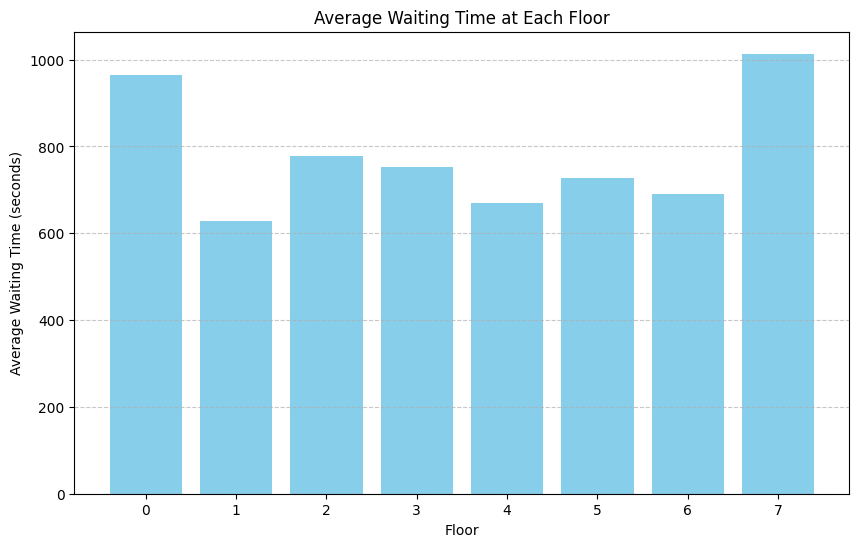

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(num_floors), [average_waiting_times[floor] for floor in range(num_floors)], color='skyblue')
plt.xlabel('Floor')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Average Waiting Time at Each Floor')
plt.xticks(range(num_floors))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

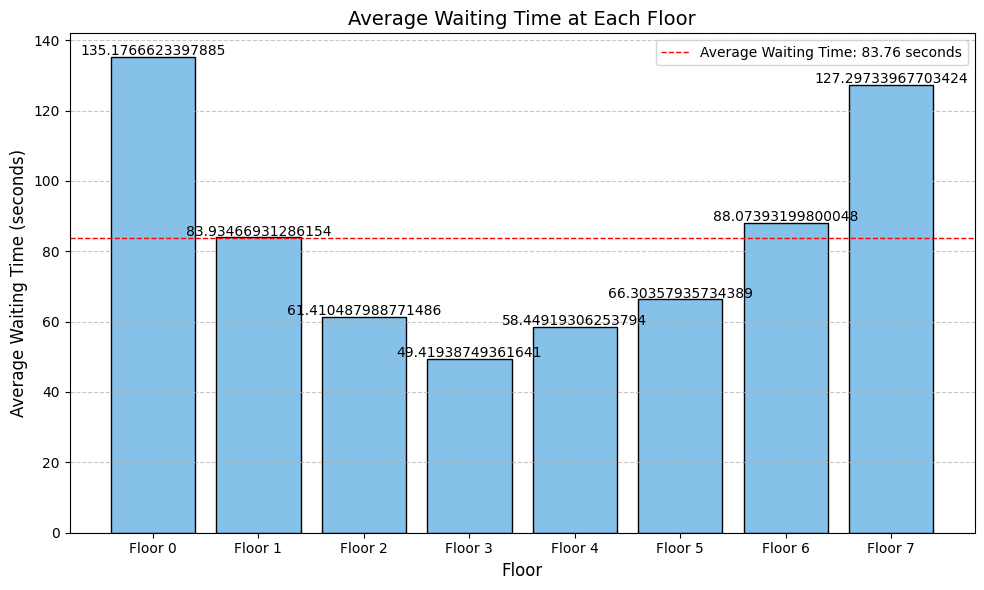

In [ ]:
plt.figure(figsize=(10, 6))

# Bar plot
plt.bar(range(num_floors), [average_waiting_times[floor] for floor in range(num_floors)], color='#85C1E9', edgecolor='black')

# Add data labels
for floor in range(num_floors):
    plt.text(floor, average_waiting_times[floor] + 0.5, f'{average_waiting_times[floor]}', ha='center', fontsize=10)

# Add horizontal line at the average waiting time
average_waiting_time = np.mean(list(average_waiting_times.values()))
plt.axhline(average_waiting_time, color='red', linestyle='--', linewidth=1, label=f'Average Waiting Time: {average_waiting_time:.2f} seconds')

# Labels and title
plt.xlabel('Floor', fontsize=12)
plt.ylabel('Average Waiting Time (seconds)', fontsize=12)
plt.title('Average Waiting Time at Each Floor', fontsize=14)

# X-axis ticks
plt.xticks(range(num_floors), [f'Floor {floor}' for floor in range(num_floors)], fontsize=10)

# Y-axis ticks
plt.yticks(fontsize=10)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

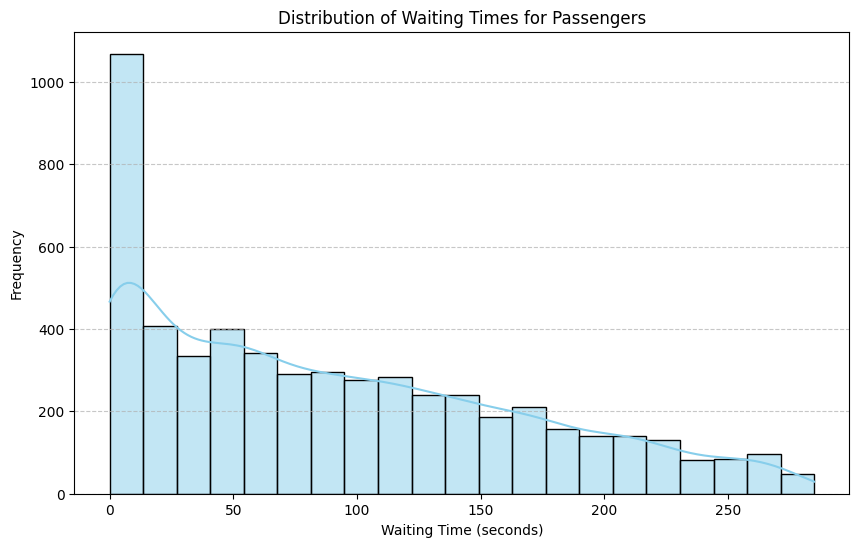

In [ ]:
import seaborn as sns

# Flatten waiting times
all_waiting_times = [time for floor_times in waiting_times.values() for time in floor_times]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(all_waiting_times, kde=True, color='skyblue')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Times for Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

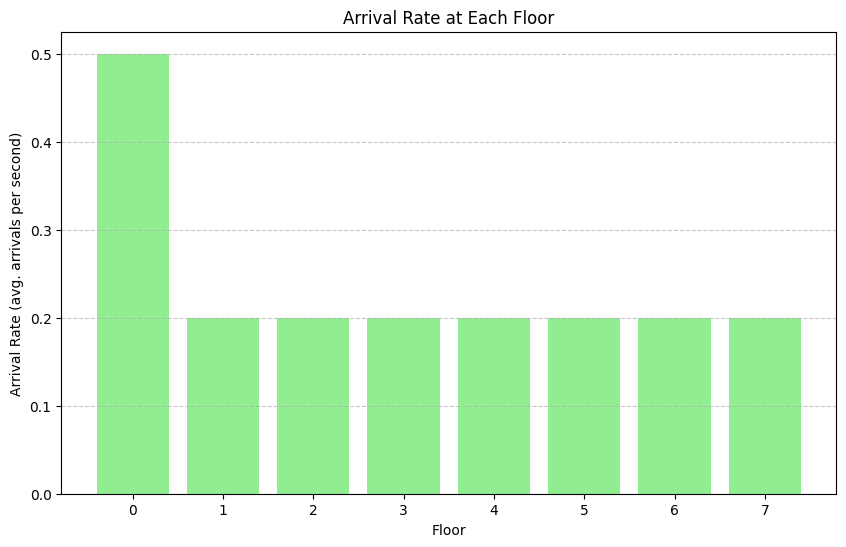

In [ ]:
# Arrival Rate vs. Floor
plt.figure(figsize=(10, 6))
plt.bar(range(num_floors), arrival_rate, color='lightgreen')
plt.xlabel('Floor')
plt.ylabel('Arrival Rate (avg. arrivals per second)')
plt.title('Arrival Rate at Each Floor')
plt.xticks(range(num_floors))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()